In [103]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [104]:
data= pd.read_csv("train.csv")

In [105]:
data.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [106]:
data_cleaned = data.drop(['PassengerId','Name','Ticket','Cabin','Fare','Embarked'],axis=1)
data_cleaned.head()

,Survived,Pclass,Sex,Age,SibSp,Parch
0,0,3,male,22.0,1,0
1,1,1,female,38.0,1,0
2,1,3,female,26.0,0,0
3,1,1,female,35.0,1,0
4,0,3,male,35.0,0,0


In [107]:
data_cleaned.describe()

,Survived,Pclass,Age,SibSp,Parch
count,891.000000,891.000000,714.000000,891.000000,891.000000
mean,0.383838,2.308642,29.699118,0.523008,0.381594
std,0.486592,0.836071,14.526497,1.102743,0.806057
min,0.000000,1.000000,0.420000,0.000000,0.000000
25%,0.000000,2.000000,20.125000,0.000000,0.000000
50%,0.000000,3.000000,28.000000,0.000000,0.000000
75%,1.000000,3.000000,38.000000,1.000000,0.000000
max,1.000000,3.000000,80.000000,8.000000,6.000000


In [108]:
data_cleaned.isnull().sum()

Survived      0
Pclass        0
Sex           0
Age         177
SibSp         0
Parch         0
dtype: int64

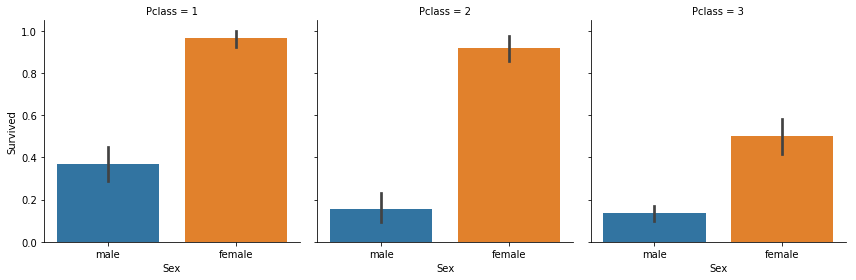

In [109]:
sns.factorplot(x="Sex",y="Survived",col="Pclass",data=data_cleaned,kind="bar")
plt.show()

In [110]:
Dead=data_cleaned.loc[data_cleaned["Survived"]==0]
survived=data_cleaned.loc[data_cleaned["Survived"]==1]

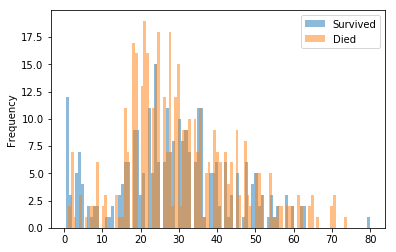

In [111]:
survived["Age"].plot.hist(alpha=0.5,label="Survived",bins=100)
Dead["Age"].plot.hist(alpha=0.5,label="Died",bins=100)
plt.legend()
plt.show()

In [112]:
def process(df,cut_points,label_names):
    df["Age"]=df["Age"].fillna(-0.5)
    df["Categories"]=pd.cut(df["Age"],cut_points,labels=label_names)
    return df
    

In [113]:
cut_points = [-1,0,5,18,35,60,100]
label_names = ["Missing","Infant","Child","Young","Adult","Senior"]

In [114]:
train = process(data_cleaned,cut_points,label_names)
train.head()

#ind = np.arange(len(label_names))
#plt.bar(train["Age"],ind)

,Survived,Pclass,Sex,Age,SibSp,Parch,Categories
0,0,3,male,22.0,1,0,Young
1,1,1,female,38.0,1,0,Adult
2,1,3,female,26.0,0,0,Young
3,1,1,female,35.0,1,0,Young
4,0,3,male,35.0,0,0,Young


In [115]:
#age_group = train.iloc[:,6]
age = train['Categories'].value_counts().sort_index()
age

Missing    177
Infant      44
Child       95
Young      358
Adult      195
Senior      22
Name: Categories, dtype: int64

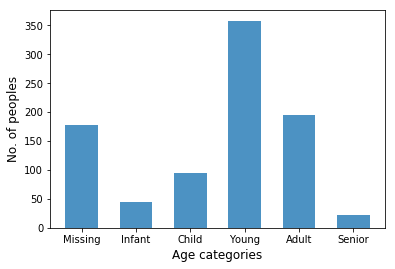

In [116]:
ind = np.arange(len(label_names))
plt.bar(ind,age,width=0.6,alpha=0.8)
plt.xticks(ind,label_names)
plt.xlabel("Age categories",fontsize=12)
plt.ylabel("No. of peoples",fontsize=12)
plt.show()

In [117]:
def create_dummies(df,column):
    dummies=pd.get_dummies(df[column],prefix=column)
    df = pd.concat([df,dummies],axis=1)
    return df

In [118]:
for column in ["Pclass","Sex","Categories"]:
    train =create_dummies(train,column)


In [119]:
train.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Categories,Pclass_1,Pclass_2,Pclass_3,Sex_female,Sex_male,Categories_Missing,Categories_Infant,Categories_Child,Categories_Young,Categories_Adult,Categories_Senior
0,0,3,male,22.0,1,0,Young,0,0,1,0,1,0,0,0,1,0,0
1,1,1,female,38.0,1,0,Adult,1,0,0,1,0,0,0,0,0,1,0
2,1,3,female,26.0,0,0,Young,0,0,1,1,0,0,0,0,1,0,0
3,1,1,female,35.0,1,0,Young,1,0,0,1,0,0,0,0,1,0,0
4,0,3,male,35.0,0,0,Young,0,0,1,0,1,0,0,0,1,0,0


In [153]:
from sklearn.linear_model import LogisticRegression
lr=LogisticRegression()

In [154]:
x_train=train.iloc[:,7:23]
y_train=train.iloc[:,0]

In [155]:
lr.fit(x_train,y_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l2', random_state=5, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False)

In [123]:
test = pd.read_csv("test.csv")
test.head()

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S


In [124]:
#test_new = test.drop(['PassengerId','Name','Ticket','Fare','Cabin','Embarked'],axis=1)

In [125]:
test_new = process(test,cut_points,label_names)
test_new.head()

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Categories
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q,Young
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S,Adult
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q,Senior
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S,Young
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S,Young


In [126]:
for column in ["Pclass","Sex","Categories"]:
    test_new =create_dummies(test_new,column)
    
test_new.head()

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,...,Pclass_2,Pclass_3,Sex_female,Sex_male,Categories_Missing,Categories_Infant,Categories_Child,Categories_Young,Categories_Adult,Categories_Senior
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,...,0,1,0,1,0,0,0,1,0,0
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,...,0,1,1,0,0,0,0,0,1,0
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,...,1,0,0,1,0,0,0,0,0,1
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,...,0,1,0,1,0,0,0,1,0,0
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,...,0,1,1,0,0,0,0,1,0,0


In [170]:
from sklearn.model_selection import train_test_split
x_train_new,x_test,y_train_new,y_test = train_test_split(x_train,y_train,test_size=0.20,random_state=0)

In [171]:
lr.fit(x_train_new,y_train_new)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l2', random_state=5, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False)

In [172]:
score1= lr.score(x_test,y_test)
print(score1)

0.8100558659217877


In [130]:
from sklearn.model_selection import cross_val_score

In [131]:
final=cross_val_score(lr,x_train,y_train,cv=10)
accuracy=final.mean()
accuracy

0.8013307229599365

In [132]:
from sklearn.svm import SVC

In [142]:
svm = SVC(kernel='poly')
svm.fit (x_train,y_train)

SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma='auto', kernel='poly',
  max_iter=-1, probability=False, random_state=None, shrinking=True,
  tol=0.001, verbose=False)

In [143]:
score2 = mod.score(x_test,y_test)
print(score2)

0.8212290502793296


In [135]:
from sklearn.naive_bayes import GaussianNB

In [144]:
nb = GaussianNB()
nb.fit(x_train,y_train)

GaussianNB(priors=None)

In [145]:
score3 = model.score(x_test,y_test)
print(score3)

0.7932960893854749


In [138]:
from sklearn.ensemble import RandomForestClassifier

In [139]:
forest = RandomForestClassifier(n_estimators=100)
forest.fit(x_train,y_train)

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=100, n_jobs=1,
            oob_score=False, random_state=None, verbose=0,
            warm_start=False)

In [140]:
score4 = model.score(x_test,y_test)
print(score4)

0.7932960893854749


In [141]:
#test_new.iloc[:,12:23]

In [146]:
predictions_lr = lr.predict(test_new.iloc[:,12:23])
predictions_mod = mod.predict(test_new.iloc[:,12:23])
predictions_nb = nb.predict(test_new.iloc[:,12:23])
predictions_forest = forest.predict(test_new.iloc[:,12:23])

In [151]:
test_ids = test_new["PassengerId"]
submission_df = {"PassengerId": test_ids,
                 "Survived": predictions_forest}
submission = pd.DataFrame(submission_df)

In [152]:
submission.to_csv("submission_forest.csv",index=False)